<a href="https://colab.research.google.com/github/ABHAY1937/-ML/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from imblearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#importing file using pandas
train_data=pd.read_csv("/content/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#size of data set
train_data.shape

(891, 12)

In [ ]:
#overview
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#missing data handling
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0, 0.5, 'Frequency')

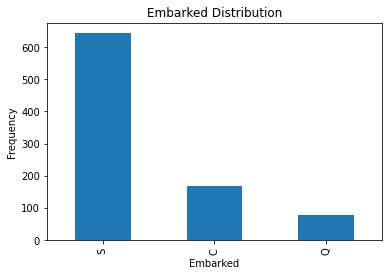

In [ ]:
#count the number of occurrences of each unique value in the 'Embarked' column 
embarked_plot = train_data['Embarked'].value_counts().plot(kind = 'bar')
plt.title('Embarked Distribution')
plt.xlabel('Embarked')
plt.ylabel('Frequency')

In [ ]:
#fill the null values by mode
train_data["Embarked"]=train_data["Embarked"].fillna("S")

Data Visualization

Text(0, 0.5, 'Normalized Count')

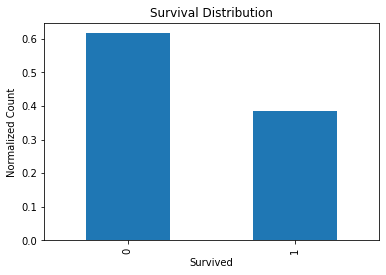

In [ ]:
#Survival Distribution
train_data['Survived'].value_counts(normalize=True).plot(kind='bar')
plt.title('Survival Distribution')
plt.xlabel('Survived')
plt.ylabel('Normalized Count')

Text(0, 0.5, 'Normalized Count')

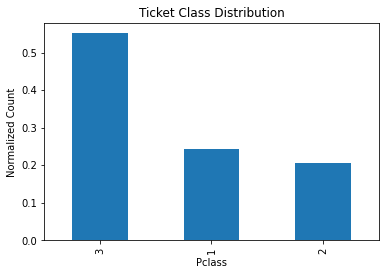

In [ ]:
# Ticket Class Distribution
train_data['Pclass'].value_counts(normalize=True).plot(kind='bar')
plt.title('Ticket Class Distribution')
plt.xlabel('Pclass')
plt.ylabel('Normalized Count')


Text(0, 0.5, 'Normalized Count')

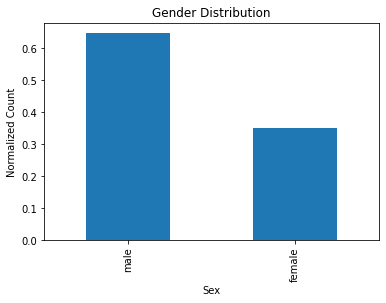

In [ ]:
# Gender Distribution
train_data['Sex'].value_counts(normalize=True).plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Normalized Count')

Text(0, 0.5, 'Normalized Count')

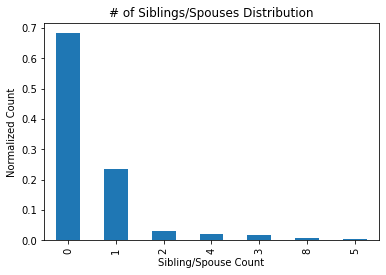

In [ ]:
# number of Siblings/Spouses Distribution
train_data['SibSp'].value_counts(normalize=True).plot(kind='bar')
plt.title('# of Siblings/Spouses Distribution')
plt.xlabel('Sibling/Spouse Count')
plt.ylabel('Normalized Count')

Text(0, 0.5, 'Normalized Count')

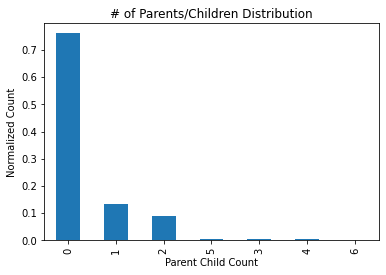

In [ ]:
# number of parent child count
train_data['Parch'].value_counts(normalize=True).plot(kind='bar')
plt.title('# of Parents/Children Distribution')
plt.xlabel('Parent Child Count')
plt.ylabel('Normalized Count')

Text(0, 0.5, 'Frequency')

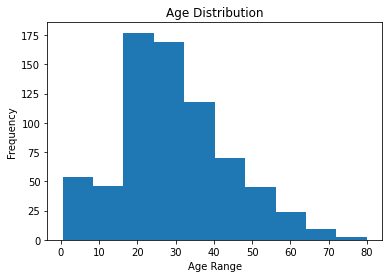

In [ ]:
# age distribution
train_data['Age'].plot(kind='hist')
plt.title('Age Distribution')
plt.xlabel('Age Range')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

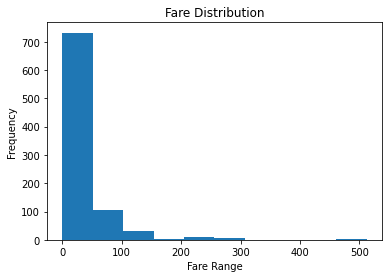

In [ ]:
# fare distribution
train_data['Fare'].plot(kind='hist')
plt.title('Fare Distribution')
plt.xlabel('Fare Range')
plt.ylabel('Frequency')

In [ ]:
# fill a missing values in the "Age" column using the median of age has a same sex and pclass
train_data["Age"] = train_data.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

Text(0, 0.5, 'Survived Frequency (Normalized)')

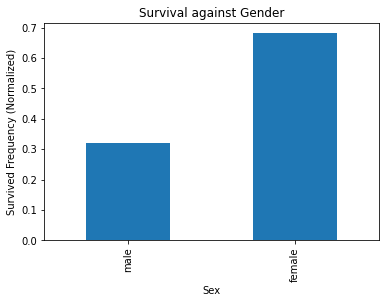

In [ ]:
# Survival against Gender
train_data['Sex'][train_data['Survived']==1].value_counts(normalize=True, ascending=True).plot(kind='bar')
plt.title('Survival against Gender')
plt.xlabel('Sex')
plt.ylabel('Survived Frequency (Normalized)')

Text(0.5, 1.0, 'Ticket Class vs Survival')

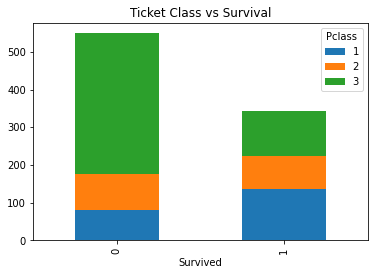

In [ ]:
# Ticket Class vs Survival
train_data.groupby(['Survived', 'Pclass']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Ticket Class vs Survival')

Text(0, 0.5, 'Count')

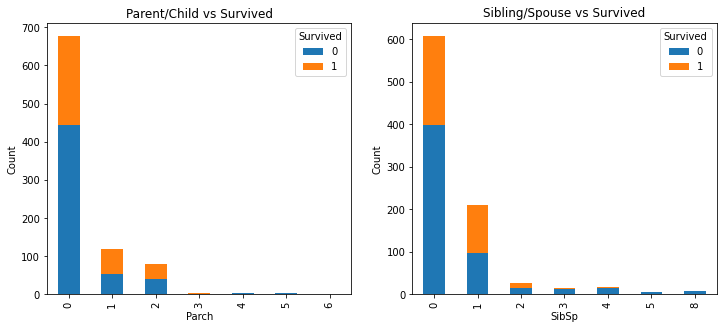

In [ ]:
# relationship between survival rate and a different variable related to family relationships 

fig = plt.figure(figsize=(12,5))
plt.subplots_adjust(hspace=.5)

ax = plt.subplot2grid((1,2), (0,0))
train_data.groupby(['Parch', 'Survived']).size().unstack().plot(kind='bar', stacked=True, ax=ax)
plt.title('Parent/Child vs Survived')
plt.ylabel('Count')

ax = plt.subplot2grid((1,2), (0,1))
train_data.groupby(['SibSp', 'Survived']).size().unstack().plot(kind='bar', stacked=True, ax=ax)
plt.title('Sibling/Spouse vs Survived')
plt.ylabel('Count')

Feature Engineering

In [ ]:
#feature engineering
# create a new feature : family size
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1

Text(0.5, 1.0, 'Family vs Survival')

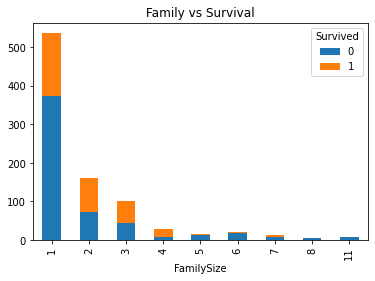

In [ ]:
train_data.groupby(['FamilySize', 'Survived']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Family vs Survival')


In [ ]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [ ]:
test=pd.read_csv("/content/test.csv")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
test["Age"] = test.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))
test["Fare"] = test["Fare"].fillna(test["Fare"].dropna().median())   
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  FamilySize   418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


Feature selection and encoding categorical variables

In [ ]:
# Feature selection
X_train = train_data[['Pclass','Sex', 'Age', 'Fare', 'Embarked', 'FamilySize']]
X_test = test[['Pclass','Sex', 'Age', 'Fare', 'Embarked', 'FamilySize']]
# one-hot encoding
labels_to_encode = ['Pclass', 'Sex', 'Embarked']
for label in labels_to_encode:
    X_train = X_train.join(pd.get_dummies(X_train[label], prefix = label))
    X_train.drop(label, axis=1, inplace=True)
for label in labels_to_encode:
    X_test = X_test.join(pd.get_dummies(X_test[label], prefix = label))
    X_test.drop(label, axis=1, inplace=True)
y = train_data['Survived'].values

In [ ]:
X_train.head(1)

,Age,Fare,FamilySize,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.25,2,0,0,1,0,1,0,0,1


Train Model

In [ ]:
from sklearn.linear_model import LogisticRegression            # for Machine Learning algorithms (Logistic Regression)
from sklearn.model_selection import cross_val_score            # for Cross validation score
from sklearn.ensemble import RandomForestClassifier            # for Machine Learning algorithms (Random Forest).
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB

In [ ]:
#logistic regression
lr_model =  LogisticRegression(solver='liblinear')
scores = cross_val_score(lr_model, X_train, y, cv=5)
print(round(np.mean(scores*100)))
lr_model.fit(X_train,y)
predictions_lr = lr_model.predict(X_test)
submission_lr = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": predictions_lr
})
submission_lr.to_csv('titanic_lr.csv', index=False)

80


In [ ]:

# Random forset
rfclr = RandomForestClassifier(n_estimators=100, max_depth = 7)
scores = cross_val_score(rfclr, X_train, y, cv=5)
print(round(np.mean(scores*100)))
rfclr.fit(X_train, y)
predictions_rf = rfclr.predict(X_test)
submission_rf = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": predictions_rf
})
submission_rf.to_csv('titanic_rd.csv', index=False)

82


In [ ]:
# Gaussian
GNBclf = GaussianNB()
GNBmodel = GNBclf.fit(X_train, y)
# Model Prediction
GNB_pred = GNBclf.predict(X_test)
submission_rf = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": GNB_pred
})

submission_rf.to_csv('titanic_gn.csv', index=False)

In [ ]:
# implimentig confusion matrics
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y, GNB_pred)


ValueError: ignored